In [44]:
import h5py
import numpy as np
from pyts.image import RecurrencePlot
import tensorflow as tf
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedKFold
import random

from src.clustering_model.ConvolutionalAutoEncoder import ConvolutionalAutoEncoder
from src.clustering_model.GeneClusteringModel import GeneClusteringModel

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [45]:
data_sim = h5py.File("data/data_simulated/sim_erdosrenyi.h5", "r")
train_examples = data_sim.get("expression/data")
train_labels = data_sim.get("expression/labels")
train_examples = np.transpose(train_examples[:], (0, 2, 1))
train_labels = np.transpose(train_labels[:], (1, 0))
train_labels = tf.repeat(train_labels, train_examples.shape[1], axis=1)
train_examples = tf.reshape(train_examples, (-1, 16))
train_labels = tf.reshape(train_labels, (-1, 1))

transformer = RecurrencePlot(threshold=None)
train_images = transformer.transform(train_examples)
train_images = tf.expand_dims(train_images, axis=3)
print(train_images.shape)

test = ConvolutionalAutoEncoder()
optimizer = tf.keras.optimizers.Adam()
test.model.compile(optimizer=optimizer, loss="mse")
test.model.fit(train_images, train_images, batch_size=32, epochs=100, verbose=0)
test.model.summary()
images_reconstructed = test.model(train_images)

(4000, 16, 16, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 32)          832       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 latent (Dense)              (None, 10)                5130      
                                                                 
 dense_2 (Dense)             (None, 512)               5632      
                                                                 
 reshape_2 (Reshape)         (None, 

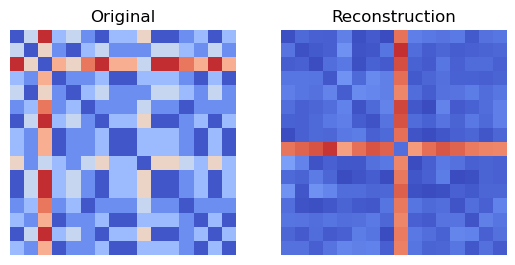

In [47]:
selected = random.sample(range(images_reconstructed.shape[0]), 10)

cmap = cm.coolwarm

for count, idx in enumerate(selected):
    data_original = train_images[idx,:,:,0]
    data_reconstruct = images_reconstructed[idx,:,:,0]

    all_data = np.append(data_original, data_reconstruct)
    all_data = np.reshape(all_data, -1)

    zmax = np.max(all_data)
    zmin=np.min(all_data)

    plt.subplot(1,2,1)

    plt.imshow(data_original, cmap=cmap, vmin=zmin, vmax=zmax)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(data, cmap=cmap, vmin=zmin, vmax=zmax)
    plt.title('Reconstruction')
    plt.axis('off')

    plt.savefig('data/images/example_%s.png' % idx, bbox_inches='tight')

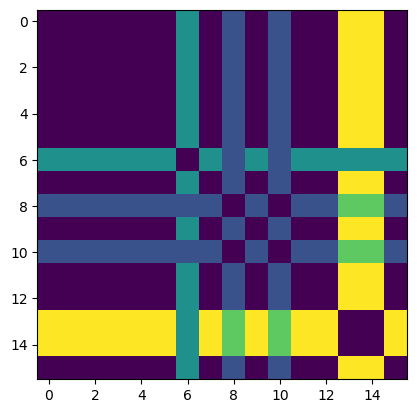

In [53]:
plt.imshow(train_images[80,:,:,0])

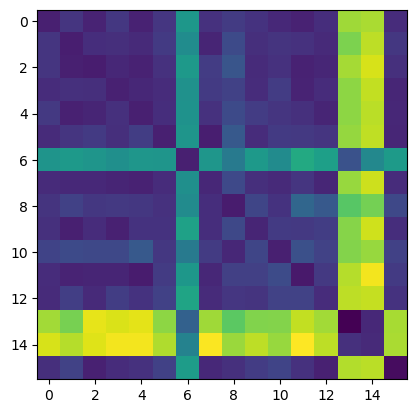

In [54]:
plt.imshow(images_reconstructed[80,:,:,0])